### **In this Notebook we test the use of an AutoML framework PyCaret**

In [1]:
import pandas as pd
import seaborn as sns
import sys
sys.path.append('..')
from Cleaning_and_Evaluation import *

Read the seleted dataset.

In [2]:
#df = pd.read_csv("../data/exosomes.raw_spectrum_400-1800.csv")
#df = pd.read_csv("../data/scaled_and_noise_removal.csv")
#pivoted_df = pd.read_csv("../data/Unscaled_Baseline_Correction.csv")
#pivoted_df = pd.read_csv("../../data/Scaled_Baseline_Correction.csv")
df = pd.read_csv("../data/current_clean_spectrum.csv")
#df = pd.read_csv("../data/scaling_test.csv")

In [3]:
# fastRP_df = pd.read_csv("../data/fastRP_embeddings.csv")
# statuses_df = pd.read_csv("../data/SpecIDs_and_Status.csv")
# pivoted_df = fastRP_df.merge(statuses_df, on="SpecID").sort_values(by="SpecID").set_index('SpecID')

In [4]:
df.head()

,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,201210-1-00,293,400.22778,201210-1,Normal,-0.145034
1,201210-1-00,294,400.91116,201210-1,Normal,-0.145878
2,201210-1-00,295,401.59454,201210-1,Normal,-0.146846
3,201210-1-00,296,402.27789,201210-1,Normal,-0.147930
4,201210-1-00,297,402.96127,201210-1,Normal,-0.149124


In [5]:
sample = df[df['SpecID'] == "210526-3-15"]

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

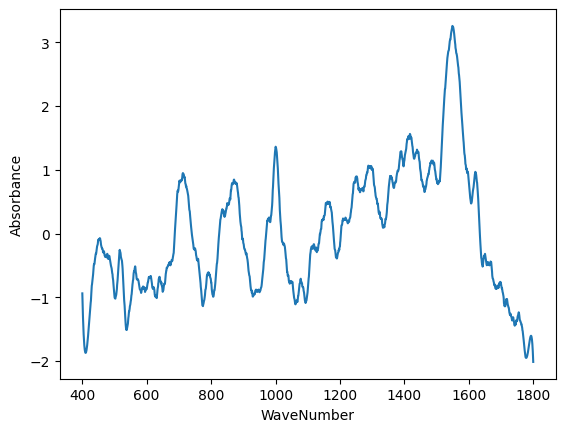

In [6]:
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)

Pivot the Dataframe to create a column for each wavelength

In [7]:
wavelength_df = prepare_wavelength_df(df)

In [8]:
wavelength_df.head()
wavelength_df = wavelength_df.drop(columns='SurID')

---

#### **PyCaret**

In [9]:
from pycaret.classification import *

Set up the PyCaret environment

In [10]:
df

,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,201210-1-00,293,400.22778,201210-1,Normal,-0.145034
1,201210-1-00,294,400.91116,201210-1,Normal,-0.145878
2,201210-1-00,295,401.59454,201210-1,Normal,-0.146846
3,201210-1-00,296,402.27789,201210-1,Normal,-0.147930
4,201210-1-00,297,402.96127,201210-1,Normal,-0.149124
...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,210526-3,Hyperglycemia,-1.512976
6239201,210526-3-09,2338,1797.72200,210526-3,Hyperglycemia,-1.502732
6239202,210526-3-09,2339,1798.40550,210526-3,Hyperglycemia,-1.493562
6239203,210526-3-09,2340,1799.08890,210526-3,Hyperglycemia,-1.485648


In [11]:
caret = setup(data=wavelength_df, target='Status', session_id=1234)

,Description,Value
0,Session id,1234
1,Target,Status
2,Target type,Multiclass
3,Target mapping,"Hyperglycemia: 0, Hypoglycemia: 1, Normal: 2"
4,Original data shape,"(3045, 2050)"
5,Transformed data shape,"(3045, 2050)"
6,Transformed train set shape,"(2131, 2050)"
7,Transformed test set shape,"(914, 2050)"
8,Numeric features,2049
9,Preprocess,True


Compare different machine learning models.

In [12]:
compare_models(exclude=['lightgbm', 'gbc'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:23:01
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8606,0.0000,0.8606,0.8648,0.8610,0.7910,0.7926,0.3330
rf,Random Forest Classifier,0.8315,0.0000,0.8315,0.8358,0.8319,0.7473,0.7489,0.7160
knn,K Neighbors Classifier,0.8283,0.0000,0.8283,0.8388,0.8288,0.7424,0.7465,0.2600
lr,Logistic Regression,0.7156,0.0000,0.7156,0.7179,0.7152,0.5722,0.5733,10.0190
ridge,Ridge Classifier,0.7020,0.0000,0.7020,0.7049,0.7016,0.5520,0.5535,0.1790
ada,Ada Boost Classifier,0.6748,0.0000,0.6748,0.6785,0.6753,0.5117,0.5126,2.9710
dt,Decision Tree Classifier,0.6598,0.0000,0.6598,0.6596,0.6590,0.4880,0.4885,0.6530
svm,SVM - Linear Kernel,0.6546,0.0000,0.6546,0.6729,0.6504,0.4803,0.4897,0.4280
nb,Naive Bayes,0.5505,0.0000,0.5505,0.5874,0.5491,0.3327,0.3454,0.1960
lda,Linear Discriminant Analysis,0.4190,0.0000,0.4190,0.4221,0.4184,0.1284,0.1291,1.7010


Processing:   0%|          | 0/57 [00:00<?, ?it/s]

Create and Tune a model.

In [ ]:
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8411,0.0000,0.8411,0.8537,0.8414,0.7624,0.7678
1,0.8779,0.0000,0.8779,0.8807,0.8782,0.8168,0.8178
2,0.8451,0.0000,0.8451,0.8533,0.8467,0.7679,0.7703
3,0.8592,0.0000,0.8592,0.8636,0.8585,0.7890,0.7916
4,0.8357,0.0000,0.8357,0.8505,0.8381,0.7543,0.7591
5,0.8263,0.0000,0.8263,0.8263,0.8253,0.7387,0.7396
6,0.8732,0.0000,0.8732,0.8755,0.8737,0.8097,0.8102
7,0.8779,0.0000,0.8779,0.8815,0.8776,0.8161,0.8182
8,0.8545,0.0000,0.8545,0.8585,0.8550,0.7818,0.7831


In [ ]:
#tuned_model = tune_model(model)
tuned_model = tune_model(model, n_iter=10, search_library='optuna')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:44:59
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2024-03-13 22:45:00,342] Searching the best hyperparameters using 2131 samples...


KeyboardInterrupt: 

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…